In [2]:
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import os
from tensorflow.keras.models import load_model


In [193]:
#load and save the images in folder

h5_path = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\Finger Signs Data sets\Signs_Data_Testing.h5"

save_folder = rf"C:\Users\Wahaj Sajid\Desktop\Datasets\Finger Signs Data sets\data_testing_extracted"
os.makedirs(save_folder, exist_ok=True)

with h5py.File(h5_path) as h5_file:
    images = h5_file['test_set_x'][:]

    #save each picture
    for i, img in enumerate(images):
        
        # If values are floats in range [0, 1], convert to uint8
        if img.max() <= 1.0:
            img = (img * 255).astype(np.uint8)

        #convert RGB to BGR
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        save_path = os.path.join(save_folder, f'image{i}.jpg')
        cv2.imwrite(save_path,img_bgr)


In [142]:
#load the training data set
with h5py.File(rf'C:\Users\Wahaj Sajid\Desktop\Datasets\Finger Signs Data sets\Signs_Data_Training.h5', 'r') as f:
    print(f.keys())
    x_train = f['train_set_x'][:]
    y_train = f['train_set_y'][:]

    print(x_train.shape)
    print(y_train.shape)

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
(1080, 64, 64, 3)
(1080,)


In [143]:
#load the testing dataset
with h5py.File(rf'C:\Users\Wahaj Sajid\Desktop\Datasets\Finger Signs Data sets\Signs_Data_Testing.h5', 'r' ) as f:
    print(f.keys())

    x_test = f['test_set_x'][:]
    y_test = f['test_set_y'][:]

print(x_test.shape)
print(y_test.shape)

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
(120, 64, 64, 3)
(120,)


# Below is the implementation of model trained on Gray Scale images (128, 128, 1)

In [144]:
#changing the shape of train images and resizing them
train_gray_images = []
for img in x_train:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img/255.0
    train_gray_images.append(img.reshape(128, 128, 1))

train_gray_images = np.array(train_gray_images)

In [145]:
#changing the shape of test images and resizing them
test_gray_images = []
for img in x_test:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img/255.0
    test_gray_images.append(img.reshape(128, 128, 1))
test_gray_images = np.array(test_gray_images)

In [146]:
image_data_generator = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split = 0.2
)

In [ ]:
#shuffle the data
train_gray_images, y_train = shuffle(train_gray_images, y_train, random_state=42)

In [147]:
#train the images on the gray scale images
model_1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (128, 128, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(units=25, activation='relu'),
    Dense(units=6, activation='softmax')
])

model_1.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
train_gen = image_data_generator.flow(train_gray_images, y_train, batch_size=32, subset = 'training')
validation_gen = image_data_generator.flow(train_gray_images, y_train, batch_size=32, subset = 'validation')
model_1.fit(train_gen, callbacks=[early_stop], epochs=55, validation_data=validation_gen)

Epoch 1/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.1783 - loss: 1.9928 - val_accuracy: 0.1574 - val_loss: 1.7917
Epoch 2/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.1797 - loss: 1.7905 - val_accuracy: 0.1713 - val_loss: 1.7827
Epoch 3/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.2470 - loss: 1.7827 - val_accuracy: 0.2963 - val_loss: 1.7743
Epoch 4/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.2998 - loss: 1.7504 - val_accuracy: 0.3194 - val_loss: 1.6651
Epoch 5/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.3501 - loss: 1.6165 - val_accuracy: 0.3102 - val_loss: 1.5686
Epoch 6/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.4143 - loss: 1.4913 - val_accuracy: 0.4583 - val_loss: 1.4526
Epoch 7/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.4841 - loss: 1.3981 - val_accuracy: 0.5139 - val_loss: 1.2566
Epoch 8/55
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.5494 - loss: 1.2561 - val_accuracy: 0.

In [148]:
#evaluate the gray_scale_images_trained_model on a training data 
loss, accuracy = model_1.evaluate(train_gray_images, y_train)
print(f"Loss", loss)
print(f"Accuracy", accuracy)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8626 - loss: 0.3925
Loss 0.3704769015312195
Accuracy 0.8805555701255798


In [149]:
#evaluate the rgb_images_trained_model on a testing data
loss, accuracy = model_1.evaluate(test_gray_images, y_test)
print(f"Loss", loss)
print(f"Accuracy", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8356 - loss: 0.4638
Loss 0.4821421802043915
Accuracy 0.8416666388511658


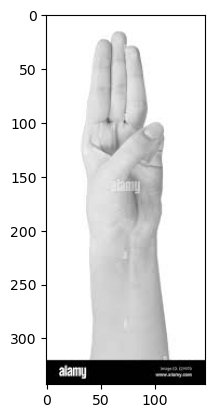

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
3
[[1.2289952e-09 6.2035946e-07 3.8955302e-04 8.2460243e-01 6.9491059e-02
  1.0551640e-01]]


In [ ]:
# load and test the 
path = rf"C:\Users\Wahaj Sajid\Desktop\three.jpeg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()
img = cv2.resize(img,(128,128))
img = img/255.0
img = img.reshape(128, 128, 1)

img = np.expand_dims(img, axis=0)

prediction = model_1.predict(img)

predict = np.argmax(prediction)
print(predict)
print(prediction)

In [ ]:
#save the model
model_1.save(r'C:\Users\Wahaj Sajid\Desktop\Machine Learning\Machine-Learning\ML\Models\finger_sign_detector.h5')

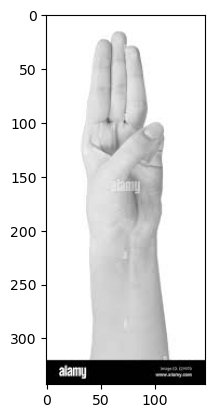

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
3
[[1.2289952e-09 6.2035946e-07 3.8955268e-04 8.2460243e-01 6.9491118e-02
  1.0551629e-01]]


In [3]:
#load the saved model to make the prediction or use in any application
finget_sign_predictor = load_model(rf"C:\Users\Wahaj Sajid\Desktop\Machine Learning\Machine-Learning\ML\Models\finger_sign_detector.h5")
path = rf"C:\Users\Wahaj Sajid\Desktop\three.jpeg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()
img = cv2.resize(img,(128,128))
img = img/255.0
img = img.reshape(128, 128, 1)

img = np.expand_dims(img, axis=0)

prediction = finget_sign_predictor.predict(img)

predict = np.argmax(prediction)
print(predict)
print(prediction)